# TASK 3 :- Iris Flowers Classification

## Importing Packages :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

## Reading the dataset :

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head(10)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
5,6,5.4,3.9,1.7,0.4,setosa
6,7,4.6,3.4,1.4,0.3,setosa
7,8,5.0,3.4,1.5,0.2,setosa
8,9,4.4,2.9,1.4,0.2,setosa
9,10,4.9,3.1,1.5,0.1,setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.columns

Index(['Unnamed: 0', 'Sepal.Length', 'Sepal.Width', 'Petal.Length',
       'Petal.Width', 'Species'],
      dtype='object')

In [6]:
# CHECKING FOR NULL VALUES

iris.isnull().sum()

Unnamed: 0      0
Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [7]:
# DROPPING THE UNNECESSARY

iris = iris.drop('Unnamed: 0', axis = 1)

In [8]:
iris.head(10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [9]:
iris['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [10]:
n = len(iris[iris['Species'] == 'versicolor'])
print("No of Versicolor in Dataset:",n)

No of Versicolor in Dataset: 50


In [11]:
n1 = len(iris[iris['Species'] == 'setosa'])
print("No of setosa in dataset", n)

No of setosa in dataset 50


In [12]:
n2 = len(iris[iris['Species'] == 'virginica'])
print("No of virginica in dataset", n)

No of virginica in dataset 50


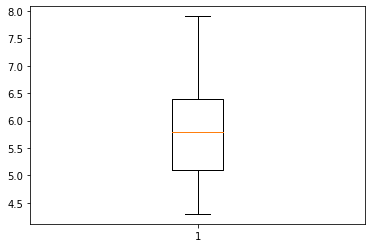

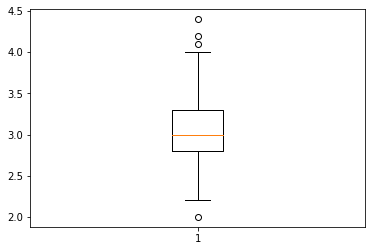

In [13]:
#Checking for outliars
import matplotlib.pyplot as plt
plt.figure(1)
plt.boxplot([iris['Sepal.Length']])
plt.figure(2)
plt.boxplot([iris['Sepal.Width']])
plt.show()

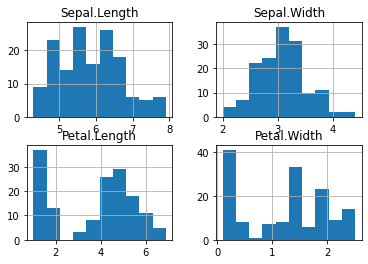

<Figure size 720x504 with 0 Axes>

In [14]:
iris.hist()
plt.figure(figsize = (10, 7))
plt.show()

## Spliting The Dataset:

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics

In [17]:
train, test = train_test_split(iris, test_size = 0.3)
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [18]:
train_X = train[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
train_y = train.Species

test_X = test[['Sepal.Length', 'Sepal.Width', 'Petal.Length',
                 'Petal.Width']]
test_y = test.Species

In [19]:
train_X

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
128,6.4,2.8,5.6,2.1
104,6.5,3.0,5.8,2.2
25,5.0,3.0,1.6,0.2
20,5.4,3.4,1.7,0.2
60,5.0,2.0,3.5,1.0
...,...,...,...,...
99,5.7,2.8,4.1,1.3
17,5.1,3.5,1.4,0.3
122,7.7,2.8,6.7,2.0
24,4.8,3.4,1.9,0.2


In [20]:
train_y

128     virginica
104     virginica
25         setosa
20         setosa
60     versicolor
          ...    
99     versicolor
17         setosa
122     virginica
24         setosa
72     versicolor
Name: Species, Length: 105, dtype: object

## Using ML model :

### Using LogisticRegression -

In [21]:
model1 = LogisticRegression()
model1.fit(train_X, train_y)
prediction = model1.predict(test_X)
prediction

array(['virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'virginica', 'versicolor', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'virginica'],
      dtype=object)

In [22]:
print('Accuracy :', metrics.accuracy_score(prediction, test_y))

Accuracy : 0.9555555555555556


In [23]:
#Confusion matrix
from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)


Confusion matrix: 
 [[14  0  0]
 [ 0 14  0]
 [ 0  2 15]]


### Using Support Vector Machine -

In [24]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score

In [25]:
print("Acc=",accuracy_score(test_y,pred_y))

Acc= 0.9555555555555556


### Using KNN Neighbors -

In [26]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

Accuracy Score: 0.9777777777777777


### Using Naive Bayes -

In [27]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

Accuracy Score: 0.9777777777777777


## Result of all the models :

In [28]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'KNN','Naive Bayes'],
    'Score': [0.9777,0.9777,0.9555,0.9555]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
0.9777,Logistic Regression
0.9777,Support Vector Machines
0.9555,KNN
0.9555,Naive Bayes
